In [ ]:
# Import necessary libraries for data handling and random data generation numpy and pandas for data manipulation, random for randomness,
#  Faker for generating fake data Initialize Faker for generating fake transaction dates
# Define the number of customers and maximum transactions per customer
# Generate unique customer IDs in the format "CUST000001" to "CUST002000"
# Create a transaction dataset with random transactions for each customer
#  Assigns a unique transaction ID
# Generates a random transaction amount between 10 and 1000
#  Randomly selects a transaction type (deposit or withdrawal)
#  Assigns a random date within the last year
# Convert the transaction list into a pandas DataFrame
# Display the first few rows of the transaction dataset

import numpy as np
import pandas as pd
import random
from faker import Faker

fake = Faker()

num_customers = 2000
max_transactions_per_customer = 20 

customers = [f"CUST{str(i).zfill(6)}" for i in range(1, num_customers + 1)]

transaction_data = []
for customer_id in customers:
    num_transactions = random.randint(1, max_transactions_per_customer)
    for _ in range(num_transactions):
        transaction_data.append({
            "customer_id": customer_id,
            "transaction_id": f"TRANS{str(len(transaction_data) + 1).zfill(6)}",
            "transaction_amount": np.random.uniform(10, 1000),
            "transaction_type": random.choice(["deposit", "withdrawal"]),
            "transaction_date": fake.date_between(start_date='-1y', end_date='today'),
        })

transaction_data = pd.DataFrame(transaction_data)

transaction_data.head()

In [ ]:
# Check the shape of the transaction dataset (number of rows and columns)
transaction_data.shape

In [ ]:
# Display the index of the transaction dataset
transaction_data.index

In [ ]:
# List all column names in the transaction dataset
transaction_data.columns

In [ ]:
# Check the data types of each column in the transaction dataset
transaction_data.dtypes

In [ ]:
# Get the unique transaction types present in the dataset
transaction_data['transaction_type'].unique()

In [ ]:
# Get the number of unique values in each column of the dataset
transaction_data.nunique

In [ ]:
# Count the number of missing (null) values in each column of the dataset
transaction_data.isnull().sum()

In [ ]:
# Count the number of non-null values in each column of the dataset
transaction_data.count()

In [ ]:
# Get the count of each transaction type (deposit/withdrawal) in the dataset
transaction_data['transaction_type'].value_counts()

In [ ]:
# Get the count of each unique transaction date in the dataset
transaction_data['transaction_date'].value_counts()

In [ ]:
# Display summary information about the dataset, including the number of non-null entries and data types of each column
transaction_data.info()

In [ ]:
# Display the first few rows of the transaction dataset to get an overview of the data
transaction_data.head()

In [14]:
# Import matplotlib for data visualization and seaborn for enhanced plotting
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

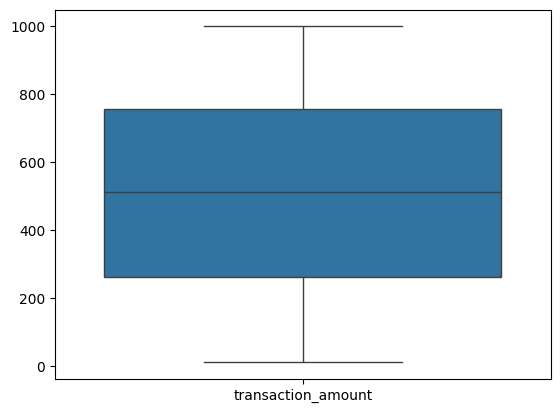

In [15]:
# Create a boxplot to visualize the distribution and outliers in the transaction dataset
sns.boxplot(data=transaction_data)

In [ ]:
# Display the first 10 rows of the transaction dataset for a closer look
transaction_data.head(10)

In [17]:
#SEPARATE THE COLUMNS USING THE LOOPS
# Loop through each element (transaction type) and create a new column with the corresponding transaction amount
# - For each transaction type, create a new column with the transaction amount if the condition is met, otherwise set it to None

elements = ['withdrawal','deposit']

for element in elements:
    Tranformed_Columns = transaction_data['transaction_type'] == element
    transaction_data[f'{element}_Value'] = transaction_data['transaction_amount'].where(Tranformed_Columns,None)

In [ ]:
# Display the first few rows of the updated transaction dataset with new columns for each transaction type's amount
transaction_data.head()

In [19]:
# Replace all missing (NaN) values in the dataset with 0
transaction_data.fillna(0,inplace=True)

In [ ]:
# Display the first few rows of the transaction dataset again to verify the changes
transaction_data.head()

In [ ]:

# Group the transaction data by customer_id and aggregate:
# - Total number of transactions per customer
# - Total transaction amount per customer
# - Average transaction amount per customer
# - Number of deposits and withdrawals for each customer
# - Total amount of withdrawals and deposits for each customer
# Reset the index to create a clean customer-level dataset

customer_data = transaction_data.groupby("customer_id").agg(
    total_transactions=("transaction_id", "count"),
    total_amount=("transaction_amount", "sum"),
    avg_transaction_amount=("transaction_amount", "mean"),
    
    num_deposits=("transaction_type", lambda x: (x == "deposit").sum()),
    num_withdrawals=("transaction_type", lambda x: (x == "withdrawal").sum()),
    withdrawals_amount=("withdrawal_Value",'sum'),
    deposits_amount=("deposit_Value",'sum')
).reset_index()
customer_data.head()

<Axes: xlabel='customer_id', ylabel='total_amount'>

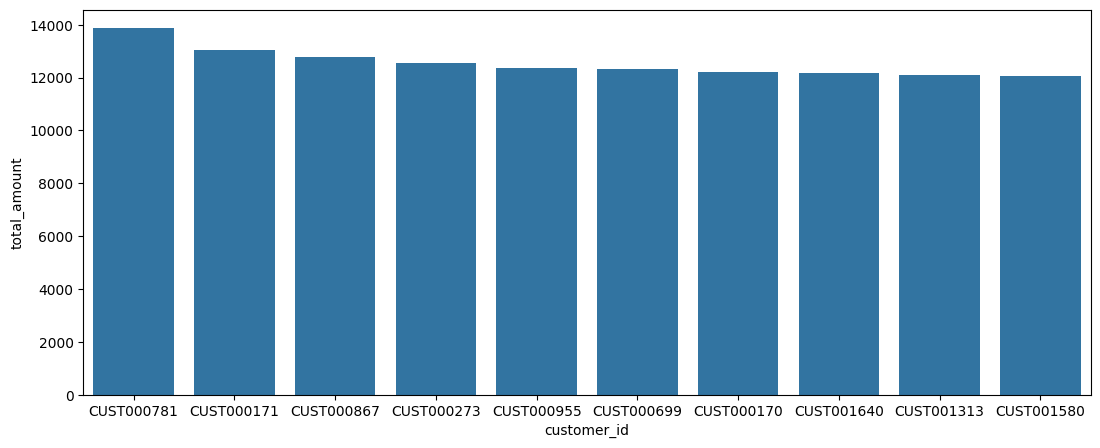

In [22]:
# Sort the customer data by total transaction amount in descending order and get the top 10 customers
# - Plot a bar chart showing the total transaction amount for the top 10 customers using seaborn
top_10 = customer_data[["customer_id","total_transactions","total_amount"]].sort_values(by='total_amount', ascending=False).head(10)
plt.figure(figsize=(13,5))
sns.barplot(x="customer_id",y="total_amount",data=top_10)


<Axes: xlabel='customer_id', ylabel='withdrawals_amount'>

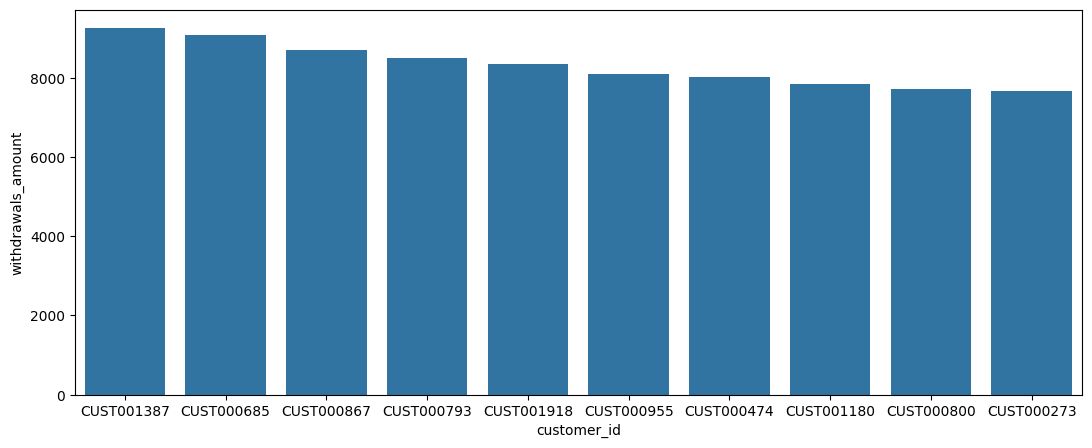

In [23]:
# Sort the customer data by withdrawal amount in descending order and get the top 10 customers
# - Plot a bar chart showing the withdrawal amount for the top 10 customers using seaborn
top_10 = customer_data[["customer_id","withdrawals_amount","deposits_amount"]].sort_values(by='withdrawals_amount', ascending=False).head(10)
plt.figure(figsize=(13,5))
sns.barplot(x="customer_id",y="withdrawals_amount",data=top_10)

<Axes: xlabel='customer_id', ylabel='deposits_amount'>

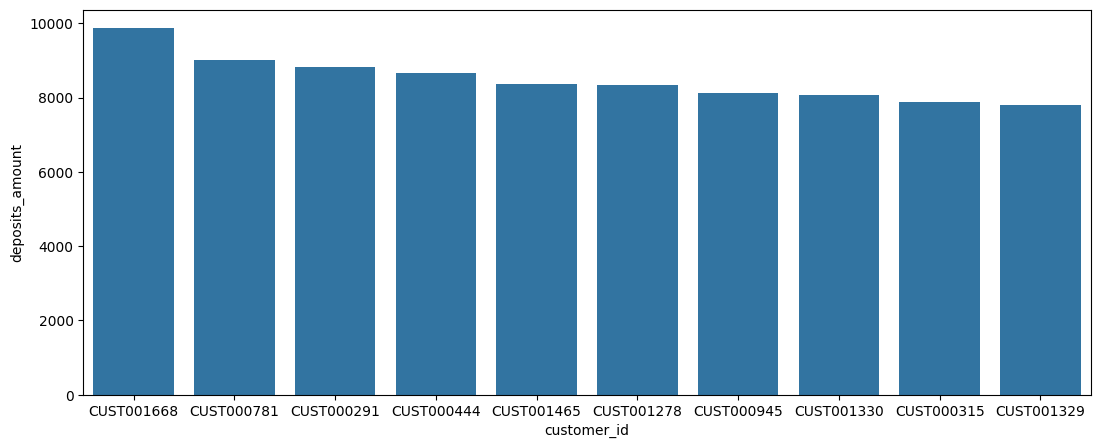

In [24]:
# Sort the customer data by deposit amount in descending order and get the top 10 customers
# - Plot a bar chart showing the deposit amount for the top 10 customers using seaborn
top_10 = customer_data[["customer_id","withdrawals_amount","deposits_amount"]].sort_values(by='deposits_amount', ascending=False).head(10)
plt.figure(figsize=(13,5))
sns.barplot(x="customer_id",y="deposits_amount",data=top_10)

In [ ]:
#CHECKING THE CORRELATION FOR NUMERIC COLUMNS USING HEATMAP
correlation_matrix = customer_data[["total_transactions", "total_amount", 
                                    "num_deposits", "num_withdrawals", "withdrawals_amount", "deposits_amount"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# SELECT TOP 10 CUSTOMERS BASED ON TOTAL AMOUNT IN DESCENDING ORDER
top_10 = customer_data[["customer_id","total_transactions","total_amount"]].sort_values(by='total_amount', ascending=False).head(10)
plt.figure(figsize=(13, 5))
sns.barplot(y="customer_id", x="total_amount", data=top_10, orient='h')
plt.xlabel("Total Amount")
plt.ylabel("Customer ID")
plt.title("Top 10 Customers by Total Amount")
plt.show()

In [ ]:
# Import StandardScaler from sklearn to scale the features of the customer data
# Select the features to be scaled
# Scale the selected features (normalize them to have mean 0 and variance 1)
# Create a new DataFrame with the scaled values for easy inspection
from sklearn.preprocessing import StandardScaler

features = ["total_transactions", "total_amount", "avg_transaction_amount", "num_deposits", "num_withdrawals","withdrawals_amount","deposits_amount"]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[features])

scaled_customer_data = pd.DataFrame(scaled_features, columns=features)

scaled_customer_data.head()

In [ ]:
# Apply KMeans clustering with 2 clusters on the scaled customer data
# Assign each customer to a cluster and add the cluster labels to the customer_data DataFrame
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
customer_data["cluster"] = kmeans.fit_predict(scaled_features)

customer_data.head(25)

In [ ]:
# Calculate the silhouette score and Davies-Bouldin index to evaluate the clustering performance
# Silhouette score indicates how similar the points are within their own cluster
# Davies-Bouldin index measures the average similarity ratio of each cluster to the cluster that is most similar to it

# Perform PCA (Principal Component Analysis) to reduce data dimensions to 2 for visualization
# Plot the 2D scatter plot of the clustered data points and highlight the cluster centers in red

from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Metrics
silhouette = silhouette_score(scaled_features, customer_data["cluster"])
db_index = davies_bouldin_score(scaled_features, customer_data["cluster"])
print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {db_index}")

# PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_features)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=customer_data["cluster"], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title('Cluster Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [28]:
# Import the joblib library to save and load machine learning models and other objects
import joblib

In [30]:
# Save the customer_data DataFrame to a file using joblib for later use or sharing
# The file is saved in the specified path with the .pkl extension
joblib.dump(customer_data, r"D:\1 DS PROJECTS\DS final project 1\save file.pkl")

['D:\\1 DS PROJECTS\\DS final project 1\\save file.pkl']

In [ ]:
# Save the scaled_customer_data DataFrame (which contains the scaled features) to a .pkl file using joblib
# The file is saved in the specified path for future use
joblib.dump(scaled_customer_data,r"D:\1 DS PROJECTS\DS final project 1\scaler.pkl")

In [148]:
from sklearn.cluster import DBSCAN
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust 'eps' and 'min_samples' as needed
customer_data["cluster"] = dbscan.fit_predict(scaled_features)


In [ ]:
# Check if there are more than one cluster in the data
# If true, calculate the silhouette score and Davies-Bouldin index to evaluate clustering quality
# If only one cluster is found, print a message stating the silhouette score is not defined

if len(set(customer_data["cluster"])) > 1:  # Ensure there is more than one cluster
    silhouette = silhouette_score(scaled_features, customer_data["cluster"])
    db_index = davies_bouldin_score(scaled_features, customer_data["cluster"])
    print(f"Silhouette Score: {silhouette}")
    print(f"Davies-Bouldin Index: {db_index}")
else:
    print("DBSCAN found less than two clusters; Silhouette Score is not defined.")

In [ ]:
# PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_features)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=customer_data["cluster"], cmap='viridis', s=50)
plt.title('Cluster Visualization (DBSCAN, PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Perform hierarchical clustering
hc = AgglomerativeClustering(n_clusters=3)
scaled_customer_data['cluster'] = hc.fit_predict(scaled_customer_data)

# Plot dendrogram
sch.dendrogram(sch.linkage(scaled_customer_data[features], method='ward'))


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Calculate silhouette score and Davies-Bouldin index for hierarchical clustering
silhouette = silhouette_score(scaled_features, scaled_customer_data["cluster"])
db_index = davies_bouldin_score(scaled_features, scaled_customer_data["cluster"])

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {db_index}")

# PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_features)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=scaled_customer_data["cluster"], cmap='viridis', s=50)
plt.title('Cluster Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
